## 1. Data preparation

1. UNet 사용해보기
2. ResNet transfer learning 해보기
3. Data augmentation 해보기
4. VGG 19 사용해보기
5. K-fold cross validation 사용해보기


In [ ]:
# 구글 코랩을 사용할 경우, 구글 드라이브를 마운트해서 사용
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
device = torch.device("cuda:0")

In [ ]:
training_subject_list = [2,3,4,5,6,7,8,9,10,11,13,14]
validation_subject_list = [15,16]
test_subject_list = [17]

### 1.1 Sample Data

In [ ]:
# 구글 코랩을 통해 구글 드라이브 경로를 지정
data_list = glob.glob('/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT융합_4번째 과제/PPG_data/*.npy')

In [ ]:
# data_list = glob.glob('PPG_data/*.npy')

In [ ]:
print(data_list)
type(data_list)

['/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT융합_4번째 과제/PPG_data/subject_10.npy', '/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT융합_4번째 과제/PPG_data/subject_11.npy', '/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT융합_4번째 과제/PPG_data/subject_13.npy', '/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT융합_4번째 과제/PPG_data/subject_14.npy', '/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT융합_4번째 과제/PPG_data/subject_15.npy', '/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT융합_4번째 과제/PPG_data/subject_16.npy', '/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT융합_4번째 과제/PPG_data/subject_2.npy', '/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT융합_4번째 과제/PPG_data/subject_3.npy', '/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT유

list

In [ ]:
data_sample = data_list[0]

In [ ]:
print(data_sample)
np.load(data_sample)

/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT융합_4번째 과제/PPG_data/subject_10.npy


array([[-2.42258672, -1.50674442, -0.7512084 , ..., -0.15599314,
         0.        , 10.        ],
       [ 0.50000144,  0.46917123,  0.41654251, ..., -0.13310999,
         0.        , 10.        ],
       [ 0.14071059,  0.11559724,  0.10575641, ...,  0.0498753 ,
         0.        , 10.        ],
       ...,
       [ 0.42447312,  0.5806025 ,  0.69613466, ..., -0.54944799,
         0.        , 10.        ],
       [ 0.15186673,  0.1284707 ,  0.10109613, ..., -0.11959965,
         0.        , 10.        ],
       [-0.43573033, -0.46554566, -0.49481923, ...,  0.55387286,
         0.        , 10.        ]])

In [ ]:
data = np.load(data_sample)
data.shape

(63, 7682)

In [ ]:
data[:, 7680:]

array([[ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1.,

In [ ]:
ppg = data[0, :7680]

(7680,)

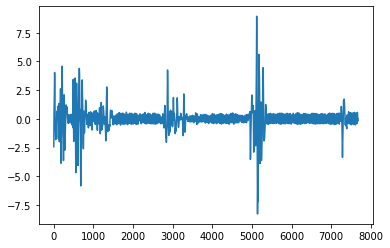

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ppg)
ppg.shape

(100,)

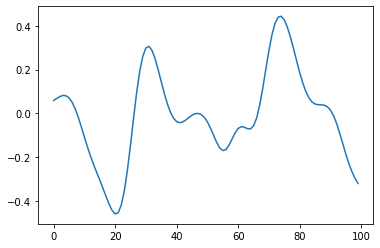

In [ ]:
plt.plot(ppg[2100:2200])
ppg[2100:2200].shape

In [ ]:
train_list = []
for num in training_subject_list :
    train_num = glob.glob('PPG_data/subject_'+str(num)+'.npy')
    train_list.append(train_num)
train_list = np.concatenate(train_list, axis=0)
print(train_list)

[]


In [ ]:
# train_data = []
# for num in train_list:
#     train = np.load(num)
#     train_data.append(train)

# train_data = np.concatenate(train_data, axis=0)
# train_data.shape

In [ ]:
# train_sample = train_data[0, :7680]
# train_tensor = torch.tensor(train_sample[np.newaxis, :]).float()
# train_tensor.size()

## 2. Define Dataset

### 2.1 데이터셋 정의(구글 코랩 사용 시)

In [ ]:
# 구글 코랩을 사용할 경우의 코드

class PPG_Dataset(Dataset):
    def __init__(self, subject_list):
        super(PPG_Dataset, self).__init__()
                
        ## To do ##
        ppg_list = []
        for num in subject_list:
            file_name = '/content/drive/MyDrive/(2021) 3학년 2학기/IT융합/IT융합_과제/IT융합_4번째 과제/PPG_data/subject_'+str(num)+'.npy'
            ppg = np.load(file_name)
            ppg_list.append(ppg)

        self.ppg_merge = np.concatenate(ppg_list, axis=0)

        
    def __getitem__(self, index):
        
        ## To do ##
        ppg_sample = self.ppg_merge[index, :7680]
        ppg_tensor = torch.tensor(ppg_sample[np.newaxis, :]).float()

        label = self.ppg_merge[index, 7680]
        label_tensor = torch.tensor(label.astype(np.long))
        # label_tensor = label_tensor.view([-1, 1])
        return ppg_tensor, label_tensor

    def __len__(self):
        return self.ppg_merge.shape[0]

### 2.2 데이터셋 정의(로켈 환경 사용 시)

In [ ]:
# # 로컬 환경에서 사용할 경우

# class PPG_Dataset(Dataset):
#     def __init__(self, subject_list):
#         super(PPG_Dataset, self).__init__()
                
#         ## To do ##
#         ppg_list = []
#         for num in subject_list:
#             file_name = 'PPG_data/subject_'+str(num)+'.npy'
#             ppg = np.load(file_name)
#             ppg_list.append(ppg)

#         self.ppg_merge = np.concatenate(ppg_list, axis=0)

        
#     def __getitem__(self, index):
        
#         ## To do ##
#         ppg_sample = self.ppg_merge[index, :7680]
#         ppg_tensor = torch.tensor(ppg_sample[np.newaxis, :]).float()

#         label = self.ppg_merge[index, 7680]
#         label_tensor = torch.tensor(label.astype(np.int64))
#         label_tensor = label_tensor.view([-1, 1])
#         return ppg_tensor, label_tensor

#     def __len__(self):
#         return self.ppg_merge.shape[0]

In [ ]:
train_dataset = PPG_Dataset(training_subject_list)
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)

In [ ]:
print(len(train_dataset))
print(train_dataset)

701


In [ ]:
x, y = train_dataset[450]
print(x.shape)
print(y.shape)

torch.Size([1, 7680])
torch.Size([])


## 3. Define model

### 3.1 Define model(Fully Connected layer 사용)

In [ ]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()

#         self.fc1 = nn.Linear(7680, 512)
#         self.fc2 = nn.Linear(512, 256)
#         self.fc3 = nn.Linear(256, 1)
#         self.relu = nn.ReLU()
#         self.flatten = nn.Flatten()
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         x = self.relu(x)
#         x = self.fc3(x)
#         x = self.sigmoid(x)

#         return x

In [ ]:
# t = torch.randn(10)
# print("t : ", t)
# print("t.shape : ", t.shape)
# print("t.view(t)", t.view([-1, 1, 1]))
# print("t.view.shape : ", t.view([-1, 1, 1]).shape)
# print("torch.flatten(t) : ", torch.flatten(t, end_dim=-1).shape)

### 3.2 Define model(VGG19 사용)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            #3 224 128
            nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1), nn.BatchNorm1d(64), nn.ReLU(),
            nn.Conv1d(64, 64, 3, padding=1), nn.BatchNorm1d(64), nn.ReLU(),
            nn.MaxPool1d(2),
            #64 112 64
            nn.Conv1d(64, 128, 3, padding=1), nn.BatchNorm1d(128), nn.ReLU(),
            nn.Conv1d(128, 128, 3, padding=1),nn.BatchNorm1d(128), nn.ReLU(),
            nn.MaxPool1d(2),
            #128 56 32
            nn.Conv1d(128, 256, 3, padding=1), nn.BatchNorm1d(256), nn.ReLU(),
            nn.Conv1d(256, 256, 3, padding=1), nn.BatchNorm1d(256), nn.ReLU(),
            nn.Conv1d(256, 256, 3, padding=1), nn.BatchNorm1d(256), nn.ReLU(),
            nn.MaxPool1d(2),
            #256 28 16
            nn.Conv1d(256, 512, 3, padding=1), nn.BatchNorm1d(512), nn.ReLU(),
            nn.Conv1d(512, 512, 3, padding=1), nn.BatchNorm1d(512), nn.ReLU(),
            nn.Conv1d(512, 512, 3, padding=1), nn.BatchNorm1d(512), nn.ReLU(),
            nn.MaxPool1d(2),
            #512 14 8
            nn.Conv1d(512, 512, 3, padding=1), nn.BatchNorm1d(512), nn.ReLU(),
            nn.Conv1d(512, 512, 3, padding=1), nn.BatchNorm1d(512), nn.ReLU(),
            nn.Conv1d(512, 512, 3, padding=1), nn.BatchNorm1d(512), nn.ReLU(),
            nn.MaxPool1d(2)
        )

        #512 7 4

        self.avg_pool = nn.AvgPool1d(2)
        #512 1 1
        self.flatten = nn.Flatten()
        # self.classifier = nn.Linear(61440, 2)
        self.relu = nn.ReLU()
        # self.leakyrelu = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(61440, 2)
        # self.batchnorm1 = nn.BatchNorm1d(4096)
        self.fc2 = nn.Linear(4096, 2)
        # self.fc3 = nn.Linear(4096, 4)
        # self.fc4 = nn.Linear(4, 2)


    def forward(self, x):
        features = self.conv(x)
        x = self.avg_pool(features)
        x = x.view(features.size(0), -1)
        x = self.flatten(x)
        # x = self.relu(x)
        x = self.fc1(x) 
        x = self.relu(x)
        # x = self.batchnorm1(x)
        # x = self.relu(x)
        # x = self.dropout(x)
        # x = self.fc2(x)
        # x = self.relu(x)
        # x = self.dropout(x)
        # x = self.fc3(x)
        # x = self.relu(x)
        # x = self.dropout(x)
        # x = self.fc4(x)
        return x

In [ ]:
net = Net().to(device)

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

In [ ]:
for epoch in range(20):
    loss_val = 0
    for itr, data in enumerate(train_loader):
        optimizer.zero_grad()
        
        ppg, label = data
        ppg, label = ppg.to(device), label.to(device)
        
        pred = net(ppg)
        # print("pred.shape : ", pred.shape)
        # print("label.shape : ", label.shape)
        loss = loss_function(pred, label)
        
        loss.backward()
        optimizer.step()
        
        loss_val += loss.item()
        
    print("Epoch:", epoch+1, "  , Loss: ", loss_val)

Epoch: 1   , Loss:  45.14514455012977
Epoch: 2   , Loss:  22.556097720516846
Epoch: 3   , Loss:  12.162976698979037
Epoch: 4   , Loss:  7.546646211121697
Epoch: 5   , Loss:  10.274681932773092
Epoch: 6   , Loss:  2.548724977332313
Epoch: 7   , Loss:  7.052406987939321
Epoch: 8   , Loss:  12.800635874650197
Epoch: 9   , Loss:  2.8312093848344375
Epoch: 10   , Loss:  2.956897114905587
Epoch: 11   , Loss:  2.849600353069036
Epoch: 12   , Loss:  1.0417915795546833
Epoch: 13   , Loss:  0.5435530178137924
Epoch: 14   , Loss:  0.20206303875943377
Epoch: 15   , Loss:  0.06348922138579383
Epoch: 16   , Loss:  0.14849441881924008
Epoch: 17   , Loss:  0.03162774791019274
Epoch: 18   , Loss:  0.015300468631295416
Epoch: 19   , Loss:  0.029495934548435798
Epoch: 20   , Loss:  0.03913401335239186


In [ ]:
torch.save(net, "model_91_8.pth")

In [ ]:
val_dataset = PPG_Dataset(validation_subject_list)
val_loader = DataLoader(dataset=val_dataset, batch_size=100, shuffle=True)

In [ ]:
pred_list = []
label_list = []
for itr, data in enumerate(val_loader):
    ppg, label = data
    ppg, label = ppg.to(device), label.to(device)
    
    pred_test = net(ppg)
    pred_category = torch.argmax(pred_test, dim=1)
    
    pred_list = pred_list + list(pred_category.cpu())
    label_list = label_list + list(label.cpu())
    
accu = np.mean(np.array(pred_list)==np.array(label_list))
print("Validation accuracy: ", accu)

Validation accuracy:  0.9180327868852459


### Do no modify the below codes ###

In [ ]:
net_load = torch.load("model.pth")

In [ ]:
test_dataset = PPG_Dataset(test_subject_list)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=True)

FileNotFoundError: ignored

In [ ]:
pred_list = []
label_list = []
for itr, data in enumerate(test_loader):
    ppg, label = data
    
    pred_test = net_load(ppg)
    pred_category = torch.argmax(pred_test, dim=1)
    
    pred_list = pred_list + list(pred_category)
    label_list = label_list + list(label)
    
accu = np.mean( np.array(pred_list)==np.array(label_list) )
print("Test accuracy: ", accu)